<a href="https://colab.research.google.com/github/dan-ski/HR_Attrition_classification/blob/master/22_09_10_final_Projekt_Praktyczny_Klasyfikacja_2022_09_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt_Praktyczny_Klasyfikacja_2022_09_10

Badamy co wplywa na dobrowolne rezygnowanie z pracy przez pracownikow.
Na podstawie naszek wiedzy eksperckiej wysuwamy hipoteze ze najwiekszy wplywa na taka decyzje ma wynagrodzenie pracownika i jego zadowolenie z pracy. Zbudujemy model aby to potwierdzic.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# df_1 = pd.read_csv('df1.csv')
df_1 = pd.read_csv('/content/df1.csv')
df_1.head()


,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


Data preparation

In [ ]:
df_1.shape

(4449, 20)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [ ]:
df_1.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [ ]:
df_1 = df_1.set_index('EmployeeNumber')

In [ ]:
df_1 = df_1.drop(["EmployeeCount"],axis=1)

In [ ]:
df_1.columns.sort_values()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked'],
      dtype='object')

All values in age column more than 100 or less than 16, are being replaced with age mean. Age mean is being calculated excluding values more than 100 or less than 16. 

In [ ]:
df_1['Age'] = df_1['Age'].map(lambda x: x if (x > 16) & (x<100) else 0)

age_count = ((df_1['Age'] < 100) & (df_1['Age'] > 16)).sum()
age_mean = df_1['Age'].sum()/age_count

df_1['Age'] = df_1['Age'].map(lambda x: age_mean if x == 0 else x )


In [ ]:
df_1['Age'].sort_values()

EmployeeNumber
1156      18.0
6314      18.0
614       18.0
6365      18.0
5908      18.0
          ... 
100098    60.0
6910      60.0
549       60.0
5356      60.0
5995      60.0
Name: Age, Length: 4449, dtype: float64

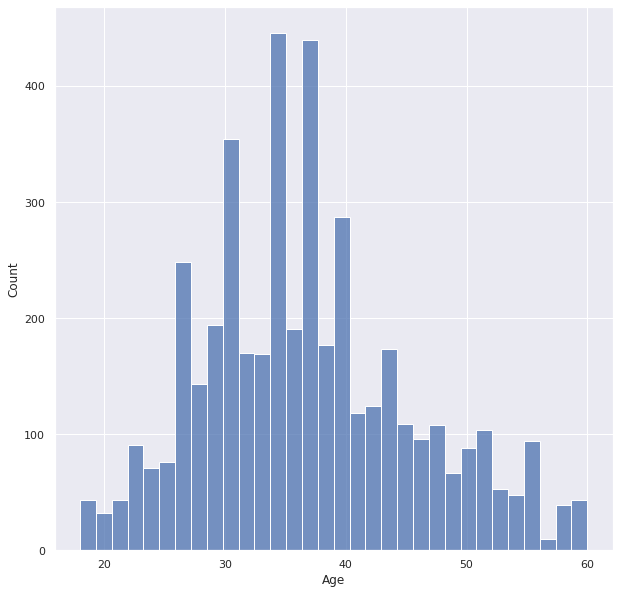

In [ ]:
sns.histplot(df_1.Age)

In [ ]:
df_1['DistanceFromHome'] = np.where(df_1['DistanceFromHome'] >= 100,
                                    (df_1["DistanceFromHome"]<=100).mean(),df_1['DistanceFromHome'] )

In [ ]:
df_1['DistanceFromHome'].describe()

count    4449.000000
mean        8.722523
std         8.094339
min         0.937289
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

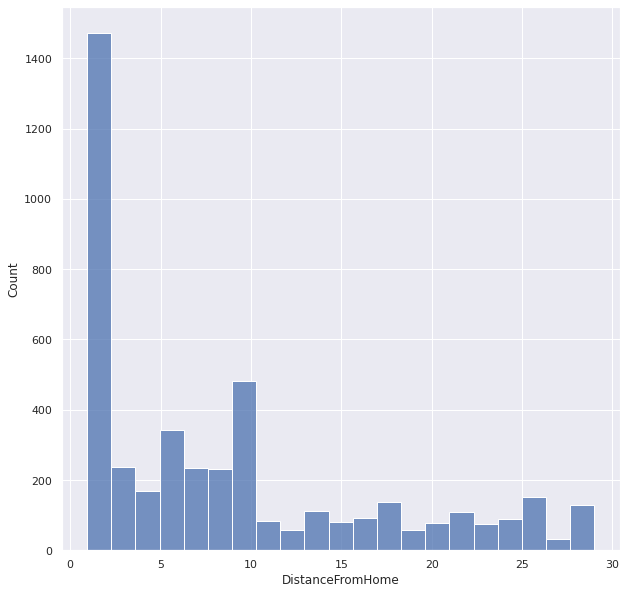

In [ ]:
sns.histplot(df_1['DistanceFromHome'])

In [ ]:
df_1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,36.781739,801.017982,8.722523,2.909867,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,8.774506,405.605362,8.094339,1.025184,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,18.000000,102.000000,0.937289,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,31.000000,458.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,42.000000,1162.000000,13.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [ ]:
df_2 = pd.read_csv('/content/df2.csv')
df_2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
df_2['Over18'].value_counts()

Y    4449
Name: Over18, dtype: int64

In [ ]:
df_2 = df_2.drop(['Over18'], axis=1)

In [ ]:
df_2.columns.sort_values()

Index(['Attrition', 'EmployeeNumber', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearlyIncome', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_2['OverTime']= df_2['OverTime'].map({'Yes':1, 'No':0}) 

In [ ]:
df_2['OverTime'].value_counts()

0    3186
1    1263
Name: OverTime, dtype: int64

In [ ]:
df_2.StandardHours.value_counts()

80.0    4449
Name: StandardHours, dtype: int64

In [ ]:
df_2 = df_2.drop(['StandardHours'], axis=1)

In [ ]:
df_2.columns.sort_values()

Index(['Attrition', 'EmployeeNumber', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearlyIncome', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_2.describe()

,EmployeeNumber,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,0.283884,15.187683,3.148573,2.725556,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,0.450932,3.642842,0.355707,1.080807,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,1.000000,18.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,1.000000,25.000000,4.000000,4.000000,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
df_2['TotalWorkingYears'].describe()

count    4449.000000
mean      342.691616
std      1484.151875
min         0.000000
25%         6.000000
50%        10.000000
75%        17.000000
max      9939.000000
Name: TotalWorkingYears, dtype: float64

In [ ]:
year_mean = df_2.loc[df_2['TotalWorkingYears'] <= 70, 'TotalWorkingYears'].mean()
year_mean

11.220605771523969

In [ ]:
df_2['TotalWoringYears'] = df_2['TotalWorkingYears'].map(lambda x: x if x <=70 else year_mean)  

In [ ]:
df_2['TotalWorkingYears'].mean()

342.69161609350414

In [ ]:
at_company_mean = df_2.loc[df_2['YearsAtCompany'] <= 70, 'YearsAtCompany'].mean()
at_company_mean

6.949439542093966

In [ ]:
df_2['YearsAtCompany'] = df_2['YearsAtCompany'].map(lambda x: x if x <=70 else at_company_mean)  

In [ ]:
df_2['YearsInCurrentRole'].describe()

count    4449.000000
mean      355.125646
std      1456.887417
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      9937.000000
Name: YearsInCurrentRole, dtype: float64

In [ ]:
role_mean = df_2.loc[df_2['YearsInCurrentRole'] <= 50, 'YearsInCurrentRole'].mean()
role_mean

4.215473608098337

In [ ]:
df_2['YearsInCurrentRole'] = df_2['YearsInCurrentRole'].map(lambda x: x if x <=50 else role_mean)  

In [ ]:
prom_mean = df_2.loc[df_2['YearsSinceLastPromotion'] <= 50, 'YearsSinceLastPromotion'].mean()
prom_mean

2.1617328519855596

In [ ]:
df_2['YearsSinceLastPromotion'] = df_2['YearsSinceLastPromotion'].map(lambda x: x if x <=50 else prom_mean)  

In [ ]:
df_2['YearsSinceLastPromotion'].describe()

count    4449.000000
mean        2.161733
std         3.096228
min         0.000000
25%         0.000000
50%         1.000000
75%         2.161733
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [ ]:
cm_mean = df_2.loc[df_2['YearsWithCurrManager'] <= 50, 'YearsWithCurrManager'].mean()
cm_mean

4.118392729012198

In [ ]:
df_2['YearsWithCurrManager'] = df_2['YearsWithCurrManager'].map(lambda x: x if x <=50 else cm_mean)  

In [ ]:
df_2['YearsWithCurrManager'].describe()

count    4449.000000
mean        4.118393
std         3.462102
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [ ]:
df_2 = df_2.set_index('EmployeeNumber')

In [ ]:
df_2.head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,TotalWoringYears
EmployeeNumber,,,,,,,,,,,,,,,
104,1,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,10.0
1638,1,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,10.0
164,0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,5.0
395,0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,5.0
53,0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,1.0


In [ ]:
df_2['Attrition'] = df_2['Attrition'].map({'Yes':1, 'No':0})
df_2['Attrition'].value_counts()

1.0    2222
0.0    2080
Name: Attrition, dtype: int64

In [ ]:
df_1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
EmployeeNumber,,,,,,,,,,,,,,,,,,
104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
#df = pd.concat([df_1, df_2], axis=1)

df = pd.merge(df_1, df_2, how='inner', on='EmployeeNumber')

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,TotalWoringYears
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,...,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0.0,61512.0,10.0
1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,...,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0.0,93072.0,10.0
164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,...,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0.0,28416.0,5.0
395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,...,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,39720.0,5.0
53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,23412.0,1.0


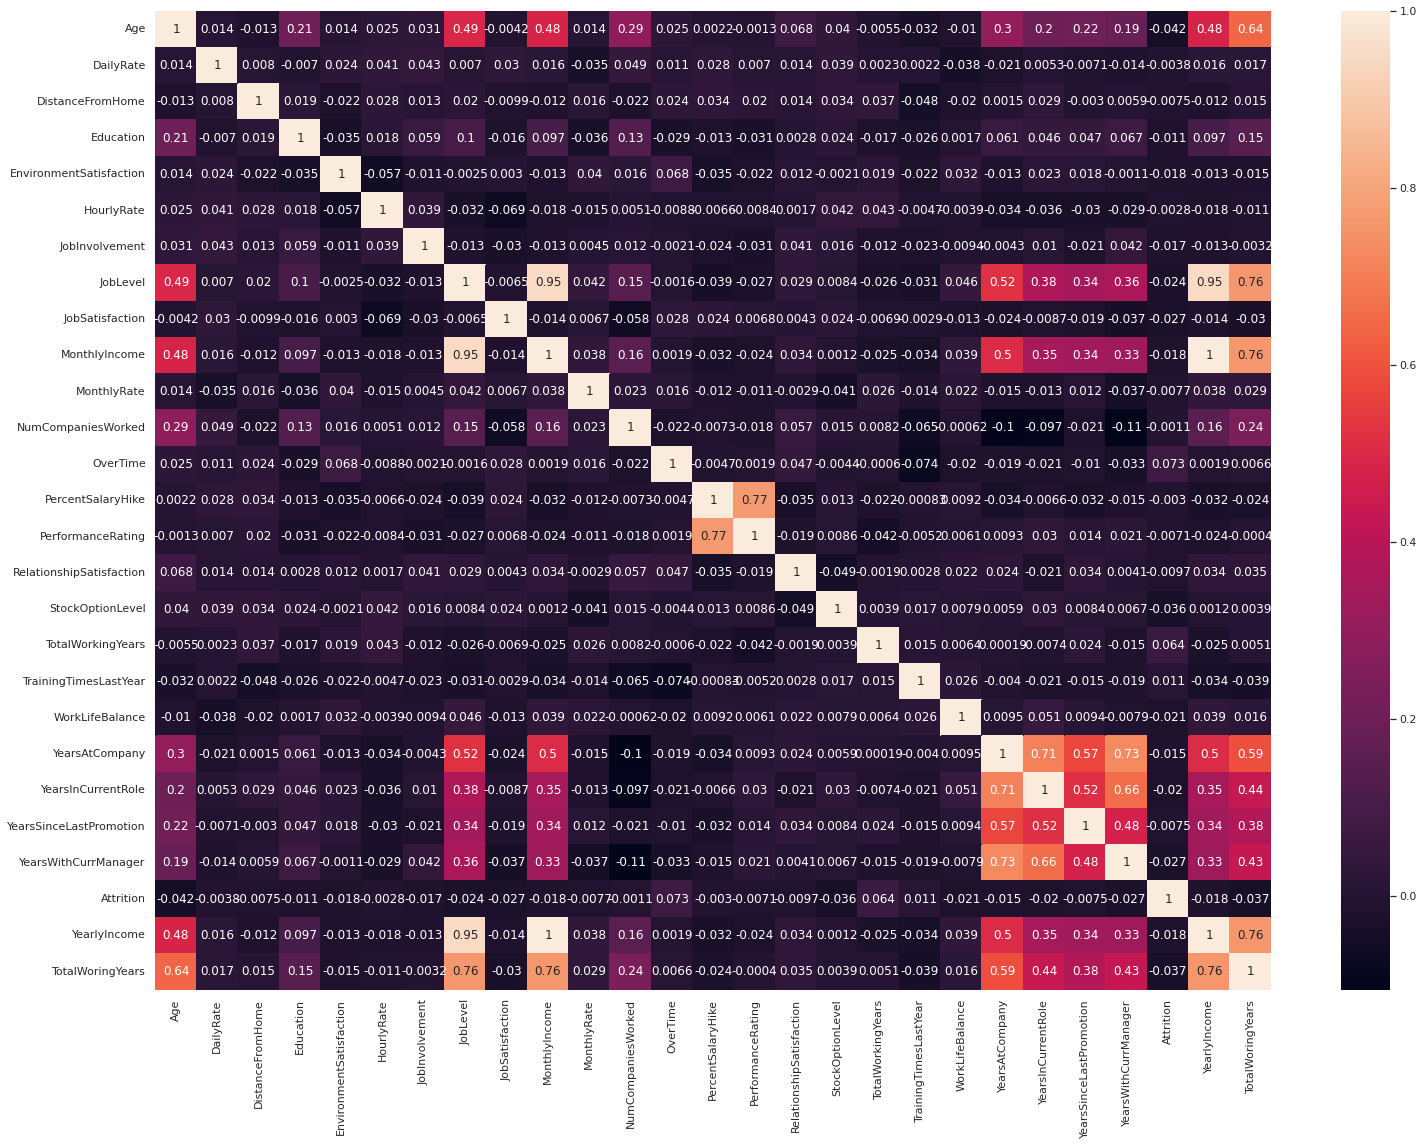

In [ ]:
corr = df.corr()

sns.set(rc = {'figure.figsize': (25,18)})
sns.heatmap(corr, annot=True)

In [ ]:
df['PerformanceRating'].value_counts()
df['PercentSalaryHike'].value_counts()

11.0    645
13.0    631
14.0    613
12.0    587
15.0    314
18.0    265
17.0    256
16.0    241
19.0    236
22.0    165
20.0    153
21.0    138
23.0     90
24.0     59
25.0     56
Name: PercentSalaryHike, dtype: int64

Dropping columns with strong correlation with another

In [ ]:
df = df.drop(['YearlyIncome'], axis=1)

In [ ]:
df = df.drop(['PerformanceRating'], axis=1)

In [ ]:
df.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWoringYears', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# df = df.drop(['MonthlyIncome'], axis=1)

In [ ]:
# df = df.drop(['TotalWorkingYears'], axis=1)

In [ ]:
# df = df.drop(['YearsInCurrentRole'], axis=1)

In [ ]:
# df = df.drop(['YearsWithCurrManager'], axis=1)

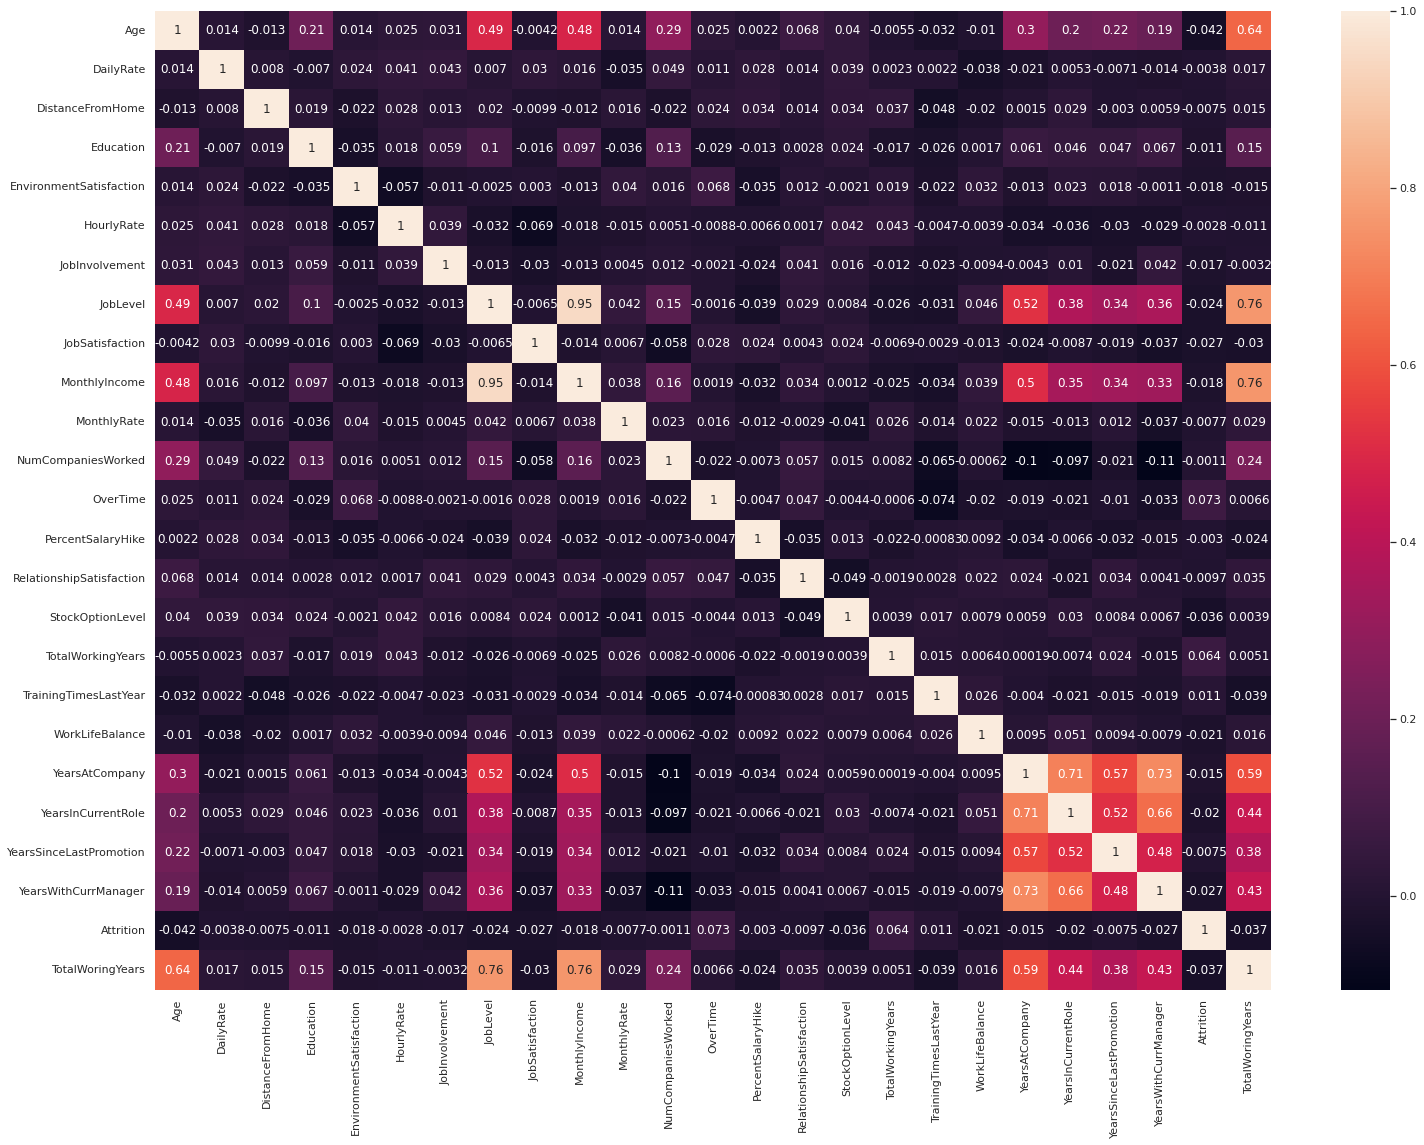

In [ ]:
corr = df.corr()

sns.set(rc = {'figure.figsize': (25,18)})
sns.heatmap(corr, annot=True)

### Deleting rows with no Attrition value.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4449 non-null   float64
 1   BusinessTravel            4449 non-null   object 
 2   DailyRate                 4449 non-null   float64
 3   Department                4449 non-null   object 
 4   DistanceFromHome          4449 non-null   float64
 5   Education                 4449 non-null   float64
 6   EducationField            4449 non-null   object 
 7   EnvironmentSatisfaction   4449 non-null   float64
 8   Gender                    4449 non-null   object 
 9   HourlyRate                4449 non-null   float64
 10  JobInvolvement            4449 non-null   float64
 11  JobLevel                  4449 non-null   float64
 12  JobRole                   4449 non-null   object 
 13  JobSatisfaction           4449 non-null   float64
 14  Marita

In [ ]:
df= df.dropna(subset=['Attrition'])

### Encoding string values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 104 to 7979
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4302 non-null   float64
 1   BusinessTravel            4302 non-null   object 
 2   DailyRate                 4302 non-null   float64
 3   Department                4302 non-null   object 
 4   DistanceFromHome          4302 non-null   float64
 5   Education                 4302 non-null   float64
 6   EducationField            4302 non-null   object 
 7   EnvironmentSatisfaction   4302 non-null   float64
 8   Gender                    4302 non-null   object 
 9   HourlyRate                4302 non-null   float64
 10  JobInvolvement            4302 non-null   float64
 11  JobLevel                  4302 non-null   float64
 12  JobRole                   4302 non-null   object 
 13  JobSatisfaction           4302 non-null   float64
 14  Marita

In [ ]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3041
Travel_Frequently     816
Non-Travel            445
Name: BusinessTravel, dtype: int64

In [ ]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1,'Travel_Frequently':2 })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['EducationField'].value_counts()

Life Sciences       1768
Medical             1344
Marketing            472
Technical Degree     393
Other                245
Human Resources       80
Name: EducationField, dtype: int64

In [ ]:
df['Department'].value_counts()

Research & Development    2815
Sales                     1305
Human Resources            182
Name: Department, dtype: int64

In [ ]:
df['JobRole'].value_counts()

Sales Executive              950
Research Scientist           883
Laboratory Technician        755
Manufacturing Director       417
Healthcare Representative    384
Manager                      287
Sales Representative         247
Research Director            229
Human Resources              150
Name: JobRole, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Married     2005
Single      1381
Divorced     916
Name: MaritalStatus, dtype: int64

In [ ]:
ohe = pd.get_dummies(df, columns = ['EducationField', 'Department', 'Gender', 'JobRole', 'MaritalStatus'])


# from sklearn.preprocessing import OneHotEncoder

# dummy = pd.get_dummies(df["Department"],
#                        prefix="Department",drop_first=True)
# df = pd.concat([df, dummy], axis=1)
#df = df.drop("Department", axis=1)


In [ ]:
ohe.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction', 'Gender_Female', 'Gender_Male', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'JobSatisfaction', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalary

In [ ]:
df = ohe

In [ ]:
df.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction', 'Gender_Female', 'Gender_Male', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'JobSatisfaction', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalary

Creating test and training sets

In [ ]:
from sklearn.model_selection import train_test_split


y = df["Attrition"]
X = df.drop(labels=["Attrition"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify = y)

Training a model- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

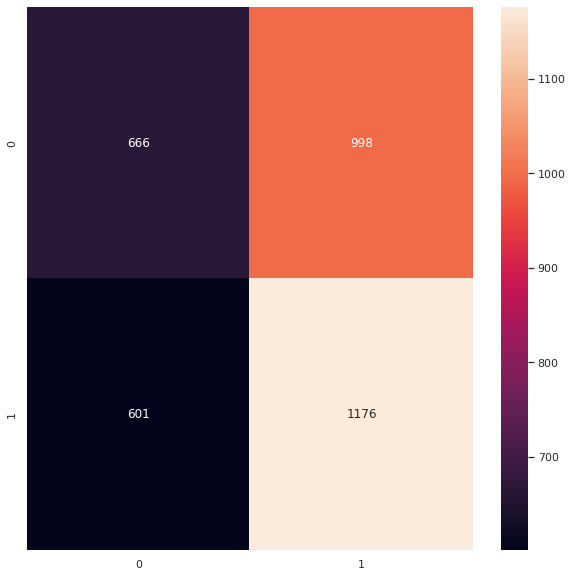

In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# %matplotlib inline
sns.set(rc = {'figure.figsize': (10,10)})
sns.heatmap(cm_train, annot=True, fmt='d')

Metrics on training set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-score: {f1_train}')

Accuracy: 0.5353095030514385
Precision: 0.5409383624655014
Recall: 0.6617895329206528
F1-score: 0.595292331055429


Tuning the hyperparameters of the model

In [ ]:
from sklearn.model_selection import GridSearchCV

C_values = [10.0**x for x in np.arange(-5, 1, 0.5)]
lr = LogisticRegression(penalty="l2", solver='liblinear')


searcher = GridSearchCV(estimator=lr, param_grid={'C': C_values}, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795]})

In [ ]:
searcher.best_estimator_

LogisticRegression(C=0.31622776601683794, solver='liblinear')

In [ ]:
searcher.best_params_

{'C': 0.31622776601683794}

In [ ]:
lr = LogisticRegression(penalty="l2", C=0.31622776601683794, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division=0)
    recall = recall_score(target, prediction, average=average, zero_division=0)
    f1 = f1_score(target, prediction, average=average, zero_division=0)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_train, y_pred_train, average='weighted'), classifier_id="LR C=0.31622776601683794 TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted'), classifier_id="LR C=0.31622776601683794 TEST SET")

Results for LR C=0.000316 TRAIN SET
----
  Accuracy:  0.5594303981400756
  Precision: 0.558784909587334
  Recall:    0.5594303981400756
  F1 score:  0.5586348031071826
  Mislabeled 1516 out of 3441


Results for LR C=0.000316 TEST SET
----
  Accuracy:  0.4878048780487805
  Precision: 0.4859265409117854
  Recall:    0.4878048780487805
  F1 score:  0.48565071911157043
  Mislabeled 441 out of 861




In [ ]:
coś

from pandas._libs.hashtable import value_count
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

C_values = [10.0**x for x in np.arange(-10, 10, 0.5)]
train_errs = list()
test_errs = list()

# Policzyć error dla modelu dla każdego C
for C_value in C_values:
  lr = LogisticRegression(penalty="l2", C=C_value, solver='liblinear')
  lr.fit(X_train, y_train)

  # Policzmy błąd:
  train_errs.append(1.0 - lr.score(X_train, y_train))
  test_errs.append(1.0 - lr.score(X_test, y_test))


NameError: ignored

In [ ]:
plt.semilogx(C_values, train_errs, C_values, test_errs)
plt.legend(("train", "validation"))
plt.show()

Metrics on testing set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division=0)
    recall = recall_score(target, prediction, average=average, zero_division=0)
    f1 = f1_score(target, prediction, average=average, zero_division=0)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test.values, y_pred), 'Regresja')

Tworzymy model- klassyfikator naiwnego Bayesa

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_mnb = mnb.predict(X_test)
# confusion_matrix(y_test, y_mnb)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_gnb = gnb.predict(X_test)
#confusion_matrix(y_test, y_gnb)

Sprawdzamy metryki modelu:

In [ ]:
print_results(calculate_metrics(y_test.values, y_mnb), 'MNB')
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')

Tworzymy drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# xs, ys = get_grid(X_train)
# predicted = clf.predict(
#     np.column_stack((xs.flatten(),
#                      ys.flatten()))).reshape(xs.shape)
# fig, ax = plt.subplots()
# ax.pcolormesh(xs, ys, predicted)
# ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=300)
plot_tree(clf)
plt.show()

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas[:-1]

dt_classifiers=[]

for elem in alphas:
  dt = DecisionTreeClassifier(ccp_alpha=elem)
  dt.fit(X_train, y_train)
  dt_classifiers.append(dt)

In [ ]:
train_scores = []
for clf in dt_classifiers:
  train_scores.append(clf.score(X_train, y_train))

In [ ]:
test_scores = [ clf.score(X_test, y_test) for clf in dt_classifiers ]

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'ccp_alpha': (alphas) }

dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

In [ ]:
y_clf = clf.predict(X_test)

In [ ]:
clf.best_params_

In [ ]:
print_results(calculate_metrics(y_test.values, y_clf), 'Drzewo')

In [ ]:
from sklearn.metrics import plot_confusion_matrix

sns.set(rc={'figure.figsize':(10.7,7.27)})

plot_confusion_matrix(clf, X_test, y_test, normalize='true')

In [ ]:
dt_prunned = clf.best_estimator_

In [ ]:
feature_importances = pd.Series(dt_prunned.feature_importances_, 
                                index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')

Regresja logistyczna

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def calculate_metrics(target, prediction, average='macro'):
#     accuracy = accuracy_score(target, prediction)
#     precision = precision_score(target, prediction, average=average, zero_division=0)
#     recall = recall_score(target, prediction, average=average, zero_division=0)
#     f1 = f1_score(target, prediction, average=average, zero_division=0)
#     mislabeled = (target != prediction).sum()
#     total = len(target)
#     return accuracy, precision, recall, f1, mislabeled, total

# def print_results(metrics, classifier_id='classifier'):
#     print(f'Results for {classifier_id}')
#     print('----')
#     print(f'  Accuracy:  {metrics[0]}')
#     print(f'  Precision: {metrics[1]}')
#     print(f'  Recall:    {metrics[2]}')
#     print(f'  F1 score:  {metrics[3]}')
#     print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
#     print('\n')

In [ ]:
# print_results(calculate_metrics(y_test.values, y_mnb), 'MNB')
# print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')